In [1]:
import pandas as pd
import numpy as np
import nltk

In [3]:
jobs_data = pd.read_csv("E:\data_science_classes\data job posts.csv")

In [4]:
jobs_data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
#to know the types of jobs which is in demand in armenia, we will create a wordcloud for job types

In [6]:
job_type = jobs_data.Title

In [7]:
job_type.shape

(19001,)

### creating the corpus

In [8]:
import re
corpus = []
for i in range(0, len(job_type)):
    review = re.sub(r'\W', ' ', str(job_type[i]))
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [20]:
corpus[9:28]

['Program Assistant INL FSN 8 FP 6 ',
 'Short Term Travel Grants STG Program',
 'Non paid part or full time Administrative Intern',
 'Chief of Party COP ',
 'Community Development Capacity Building and Conflict',
 'General Manager',
 'Network Administrator',
 'Utopian World Championship 2004',
 'Country Economist NOB ',
 'Driver Logistics Assistant',
 'Graphic Designer',
 'Administrative Assistant',
 'Lawyer',
 'Marketing Advisor',
 'Chief Supervisor of Programs Department',
 'Journalism Trainer',
 'Deputy Program Director',
 'Student Forum Student Conference and Debate Forum April 17 ',
 'Reporting Diversity Workshop for Journalists']

### Remove all punctuations from title

In [9]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

data_words[0]


['chief', 'financial', 'officer']

In [21]:
corpus[0]

'Chief Financial Officer'

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
from nltk.corpus import stopwords

In [15]:
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vipul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [48]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [49]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc =nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [50]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['chief', 'financial', 'officer']]


In [51]:
list2 = [x for x in data_lemmatized if x != []]

In [52]:
for i in range(len(list2)):
    list2[i] = ' '.join(list2[i])

In [53]:
list2[0:5]

['chief financial officer',
 'community connection intern pay internship',
 'country coordinator',
 'specialist',
 'software developer']

In [54]:
#selecting top 1000 words for wordcloud

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vipul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
titlecount = {}
for data in list2:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

In [65]:
titlecount

{'chief': 514,
 'financial': 308,
 'officer': 684,
 'community': 44,
 'connection': 4,
 'intern': 79,
 'pay': 7,
 'internship': 27,
 'country': 30,
 'coordinator': 414,
 'specialist': 1947,
 'software': 1054,
 'developer': 1791,
 'accountant': 400,
 'finance': 220,
 'assistant': 497,
 'part': 14,
 'full_time': 1,
 'programmatic': 3,
 'manage': 15,
 'director': 449,
 'program': 327,
 'travel': 9,
 'grant': 40,
 'stg': 1,
 'administrative': 282,
 'cop': 1,
 'capacity_building': 6,
 'conflict': 8,
 'general': 66,
 'manager': 2522,
 'network': 157,
 'utopian': 1,
 'economist': 46,
 'driver': 93,
 'logistic': 39,
 'graphic': 105,
 'designer': 358,
 'lawyer': 221,
 'marketing': 563,
 'journalism': 15,
 'trainer': 55,
 'forum': 1,
 'report': 62,
 'diversity': 3,
 'workshop': 23,
 'journalist': 57,
 'consultant': 403,
 'training': 134,
 'demographic': 2,
 'analysis': 51,
 'german': 13,
 'young': 9,
 'practice': 5,
 'ni': 1,
 'volunteer': 8,
 'child': 15,
 'teacher': 62,
 'information': 102,
 '

In [66]:
import heapq
# Selecting best 100 features
freq_words = heapq.nlargest(1000,titlecount,key=titlecount.get)

In [67]:
freq_words

['manager',
 'specialist',
 'developer',
 'senior',
 'software',
 'sale',
 'engineer',
 'officer',
 'project',
 'marketing',
 'chief',
 'assistant',
 'director',
 'coordinator',
 'consultant',
 'accountant',
 'web',
 'administrator',
 'expert',
 'designer',
 'analyst',
 'net',
 'program',
 'system',
 'medical',
 'financial',
 'service',
 'development',
 'administrative',
 'language',
 'division',
 'technical',
 'unit',
 'business',
 'credit',
 'executive',
 'translator',
 'lawyer',
 'finance',
 'support',
 'legal',
 'english',
 'branch',
 'office',
 'management',
 'php',
 'team',
 'customer',
 'course',
 'quality',
 'network',
 'leader',
 'corporate',
 'lead',
 'internal',
 'operation',
 'junior',
 'auditor',
 'training',
 'database',
 'agent',
 'product',
 'department',
 'communication',
 'application',
 'public',
 'loan',
 'supervisor',
 'market',
 'architect',
 'procurement',
 'graphic',
 'security',
 'relation',
 'information',
 'local',
 'assurance',
 'national',
 'operator',
 'dr

In [79]:
text = " ".join(freq_words)

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

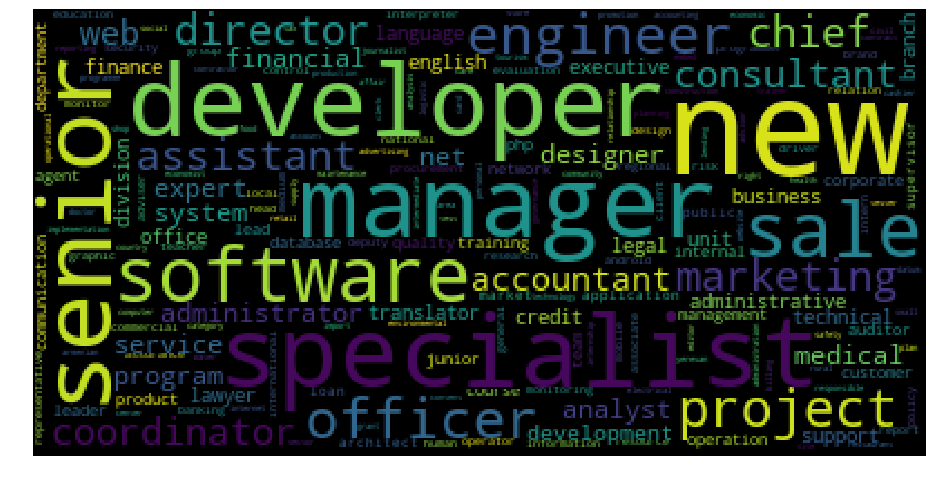

In [77]:
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [82]:
#to check if the jjob posting is related to it or not

In [85]:
# Defining X
jobs_data['X1'] = jobs_data['Title'].str.cat(jobs_data['JobRequirment'], sep =" ").str.cat(jobs_data['RequiredQual'], sep =" ")
X=jobs_data['X1']

# Defining Y
di={False:0,True:1}
jobs_data['IT_y']=jobs_data['IT'].map(di)
y=jobs_data['IT_y']

In [86]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

In [91]:
corpus[2]

'country coordinator working with the country director to provide environmental information to the general public via regular electronic communications and serving as the primary local contact to armenian ngos and businesses and the armenian offices of international organizations and agencies helping to organize and prepare cenn seminars workshops participating in defining the strategy and policy of cenn in armenia the caucasus region and abroad degree in environmentally related field or 5 years relevant experience oral and written fluency in armenian russian and english knowledge experience of working with environmental issues specific to armenia is plus remuneration salary commensurate with experience '

In [92]:
from nltk.stem import PorterStemmer
#sentences = nltk.sent_tokenize(paragraph)
stemmer = PorterStemmer()

# Stemming
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words]
    corpus[i] = ' '.join(words)  

In [94]:
corpus[2]

'countri coordin work with the countri director to provid environment inform to the gener public via regular electron commun and serv as the primari local contact to armenian ngo and busi and the armenian offic of intern organ and agenc help to organ and prepar cenn seminar workshop particip in defin the strategi and polici of cenn in armenia the caucasu region and abroad degre in environment relat field or 5 year relev experi oral and written fluenci in armenian russian and english knowledg experi of work with environment issu specif to armenia is plu remuner salari commensur with experi'

In [95]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))

X = vectorizer.fit_transform(corpus).toarray()

In [104]:
X.shape

(19001, 331)

### Building Logistic Regression Model

In [97]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=.3,
                                              random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.9087879319417645
train_accuracy:  0.9076691729323308


In [106]:
print('AUC train :',metrics.roc_auc_score(train_y,logreg.predict(train_x)))
print('AUC test :',metrics.roc_auc_score(test_y,logreg.predict(test_x)))

AUC train : 0.8111542567805332
AUC test : 0.8046443025052433


Text(0.5, 15.0, 'Predicted label')

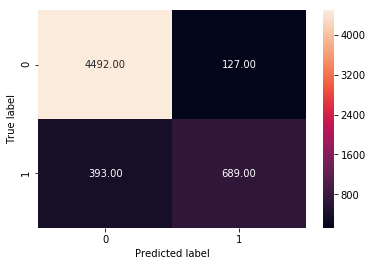

In [107]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
from sklearn.metrics import classification_report
print(classification_report(test_y,logreg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4619
           1       0.84      0.64      0.73      1082

   micro avg       0.91      0.91      0.91      5701
   macro avg       0.88      0.80      0.84      5701
weighted avg       0.91      0.91      0.90      5701



In [109]:
test_predicted_prob=pd.DataFrame(logreg.predict_proba(test_x))[[1]]
test_predicted_prob.columns=['prob']
actual=test_y.reset_index()
actual.drop('index',axis=1,inplace=True)

# making a DataFrame with actual and prob columns
df_test_predict = pd.concat([actual, test_predicted_prob], axis=1)
df_test_predict.columns = ['actual','prob']
df_test_predict.head()

,actual,prob
0,0,0.010184
1,0,0.228318
2,1,0.789696
3,0,0.013131
4,1,0.865659


In [110]:
test_roc_like_df = pd.DataFrame()
test_temp = df_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    
    accuracy=(test_temp['tp'].sum()+test_temp['tn'].sum()) / (test_temp['tp'].sum() + test_temp['fn'].sum()+test_temp['tn'].sum() + test_temp['fp'].sum())
    
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity,accuracy]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity','accuracy']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

In [111]:
test_roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.189791
0,0.020408,0.992606,0.443386,0.547623
0,0.040816,0.979667,0.620481,0.688651
0,0.061224,0.971349,0.687162,0.741098
0,0.081633,0.960259,0.719420,0.765129


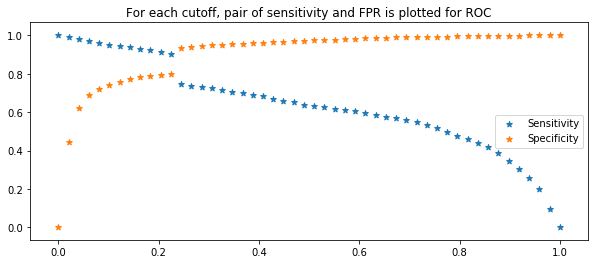

In [112]:
test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [113]:
#Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['accuracy']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.142857,0.938078,0.771812,0.803368,1.741445


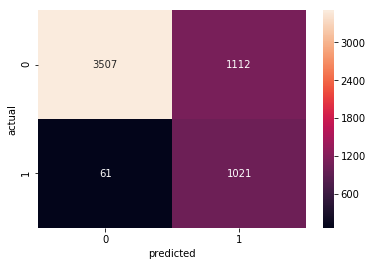

In [114]:
df_test_predict['predicted'] = df_test_predict['prob'].apply(lambda x: 1 if x > 0.122449 else 0)

import seaborn as sns
sns.heatmap(pd.crosstab(df_test_predict['actual'], df_test_predict['predicted']), annot=True, fmt='.0f')

In [115]:
accuracy=metrics.accuracy_score(df_test_predict.actual, df_test_predict.predicted)
print('Accuracy: ',round(accuracy,2))

Accuracy:  0.79


In [116]:
from sklearn.metrics import classification_report
print(classification_report(df_test_predict.actual, df_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      4619
           1       0.48      0.94      0.64      1082

   micro avg       0.79      0.79      0.79      5701
   macro avg       0.73      0.85      0.75      5701
weighted avg       0.89      0.79      0.81      5701



### random forest model

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid={'n_estimators':[100, 200, 400, 600, 800]}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=5,n_jobs=-1)
tree.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
tree.best_params_

{'n_estimators': 200}

In [121]:
radm_clf=RandomForestClassifier(oob_score=True,n_estimators=200,n_jobs=-1)
radm_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [122]:
#Model Evaluation

In [123]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,radm_clf.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,radm_clf.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.9319417646027013
train_accuracy:  0.9686466165413534


In [124]:
print('AUC train :',metrics.roc_auc_score(train_y,radm_clf.predict(train_x)))
print('AUC test :',metrics.roc_auc_score(test_y,radm_clf.predict(test_x)))

AUC train : 0.922114307060142
AUC test : 0.842995499181833


In [125]:
from sklearn.metrics import classification_report
print(classification_report(test_y,radm_clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4619
           1       0.92      0.70      0.80      1082

   micro avg       0.93      0.93      0.93      5701
   macro avg       0.93      0.84      0.88      5701
weighted avg       0.93      0.93      0.93      5701



Text(0.5, 15.0, 'Predicted label')

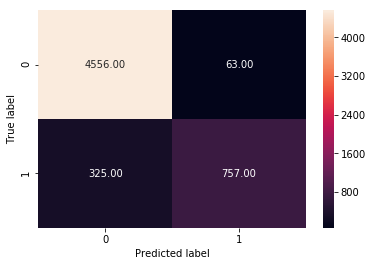

In [126]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            radm_clf.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [127]:
test_predicted_prob=pd.DataFrame(radm_clf.predict_proba(test_x))[[1]]
test_predicted_prob.columns=['prob']
actual=test_y.reset_index()
actual.drop('index',axis=1,inplace=True)

# making a DataFrame with actual and prob columns
df_test_predict = pd.concat([actual, test_predicted_prob], axis=1)
df_test_predict.columns = ['actual','prob']
df_test_predict.head()

,actual,prob
0,0,0.000
1,0,0.140
2,1,0.535
3,0,0.015
4,1,0.935


In [128]:
test_roc_like_df = pd.DataFrame()
test_temp = df_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    
    accuracy=(test_temp['tp'].sum()+test_temp['tn'].sum()) / (test_temp['tp'].sum() + test_temp['fn'].sum()+test_temp['tn'].sum() + test_temp['fp'].sum())
    
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity,accuracy]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity','accuracy']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

In [129]:
test_roc_like_df.head(5)

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.189791
0,0.020408,0.996303,0.365664,0.485353
0,0.040816,0.992606,0.523490,0.612524
0,0.061224,0.985213,0.618099,0.687774
0,0.081633,0.975970,0.681533,0.737414


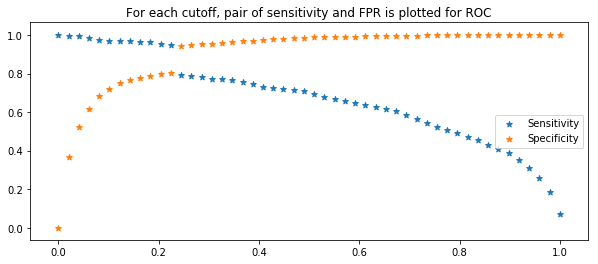

In [130]:
test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [131]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.22449,0.950092,0.805153,0.832661,1.755245


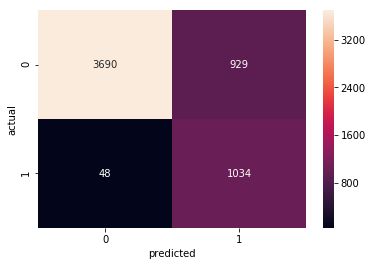

In [132]:
df_test_predict['predicted'] = df_test_predict['prob'].apply(lambda x: 1 if x > 0.204082 else 0)

import seaborn as sns
sns.heatmap(pd.crosstab(df_test_predict['actual'], df_test_predict['predicted']), annot=True, fmt='.0f')

In [133]:
accuracy=metrics.accuracy_score(df_test_predict.actual, df_test_predict.predicted)
print('Accuracy: ',round(accuracy,2))

Accuracy:  0.83


In [134]:
from sklearn.metrics import classification_report
print(classification_report(df_test_predict.actual, df_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      4619
           1       0.53      0.96      0.68      1082

   micro avg       0.83      0.83      0.83      5701
   macro avg       0.76      0.88      0.78      5701
weighted avg       0.90      0.83      0.84      5701



### Text Clustering 

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [139]:
title=list2

In [140]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(title).toarray()

In [ ]:
#Cluster Error

In [142]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X)
    cluster_errors.append( clusters.inertia_ )

In [143]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,13632.795019
1,2,12396.193416
2,3,11420.631724
3,4,10604.094504
4,5,10325.067357
5,6,10040.016855
6,7,9668.306759
7,8,9188.832009
8,9,8732.016522
9,10,8653.162168


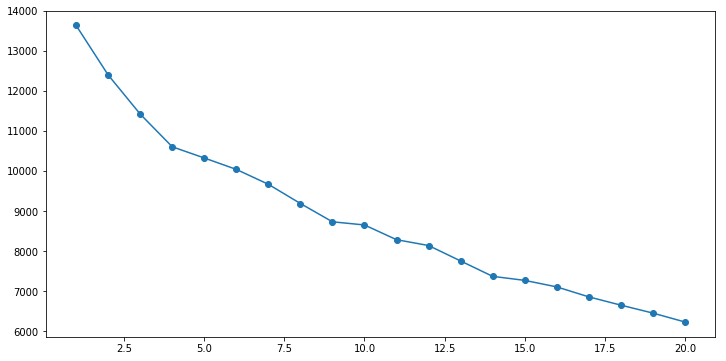

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [146]:
#Silhouette Coefficient

In [147]:
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

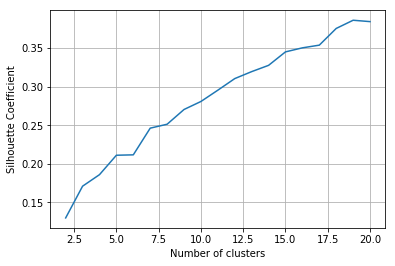

In [148]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [149]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [150]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 web
 developer
 designer
 senior
 php
 net
 analyst
 development
 team
 manager
Cluster 1:
 manager
 specialist
 sale
 officer
 project
 marketing
 assistant
 director
 chief
 coordinator
Cluster 2:
 developer
 software
 net
 php
 senior
 analyst
 marketing
 team
 business
 program
Cluster 3:
 engineer
 senior
 software
 quality
 system
 support
 service
 net
 development
 technical
Cluster 4:
 senior
 developer
 specialist
 software
 net
 accountant
 php
 analyst
 officer
 administrator
